# Combined Simulations

In [1]:
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.interpolate import griddata

plot_dir = "/Users/jiahuili/PycharmProjects/GenAI_Customer/plots/"

mpl.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})


filename = "/Users/jiahuili/PycharmProjects/GenAI_Customer/combined_simulation_data_batch_v10.csv"

df = pd.read_csv(filename)

df = df.rename(columns={'AIC Quadratic (Minimum)': 'AIC Quartic (Minimum)'})

df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,capacity_gen_ai,creativity_gen_ai,learning_rate_customer,learning_rate_gen_ai,num_customers,num_products,num_retailers,percentage_willing_to_share_info,purchase_threshold,total_steps,...,Sold Products (Unwilling),Average Seller Rating,Average Satisfaction,Willing to Share Customers,Unwilling to Share Customers,Number of Products,mean_purchase_position,creativity_gen_ai.1,AIC Quartic (Sum),AIC Quartic (Minimum)
0,0.1,0.1,1,0.6,100,100,20,1,1.5,100,...,0,4.552163,4.498735,100,0,100,23.639667,1.353300,-892.158580,-1450.356150
1,0.1,0.1,1,0.4,100,100,20,1,1.5,100,...,0,3.208987,3.337278,100,0,100,29.887333,0.843961,-67.492323,-104.964350
2,0.1,0.1,1,0.7,100,100,20,1,1.5,100,...,0,4.050908,3.137609,100,0,100,37.191500,1.360909,-76.743021,-89.726940
3,0.1,0.1,1,0.3,100,100,20,1,1.5,100,...,0,2.934728,2.593931,100,0,100,42.608500,0.602402,-7.367704,-84.783006
4,0.1,0.1,1,0.2,100,100,20,1,1.5,100,...,0,1.088951,1.375145,100,0,100,54.738000,0.299511,27.286881,-94.935035


In [2]:
filename = "/Users/jiahuili/PycharmProjects/GenAI_Customer/robustness_check_v4.csv"

df2 = pd.read_csv(filename)

df2.head()

,capacity_gen_ai,creativity_gen_ai,learning_rate_customer,learning_rate_gen_ai,num_customers,num_products,num_retailers,percentage_willing_to_share_info,purchase_threshold,total_steps,...,mean_purchase_position (Willing),mean_purchase_position (Unwilling),creativity_gen_ai.1,AIC Linear (Sum),AIC Quadratic (Sum),AIC Cubic (Sum),AIC Quartic (Sum),AIC Quartic (Minimum),AIC Quartic (Willing),AIC Quartic (Unwilling)
0,0,0,0.3,0,50,50,10,1,1.5,40,...,38.650000,0,0,-17.434318,-76.925200,-79.595391,-93.510996,-256.749690,-93.510996,NaN
1,0,0,0.3,0,50,50,10,1,1.5,40,...,38.730000,0,0,-215.557956,-210.001844,-215.367612,-221.319032,-inf,-221.319032,NaN
2,0,0,0.3,0,50,50,20,1,1.5,40,...,38.430000,0,0,2.704756,-16.775255,-12.214443,-1019.465826,-1019.465826,-1019.465826,NaN
3,0,0,0.3,0,50,50,20,1,1.5,40,...,14.440333,0,0,55.447368,-2421.978572,-2008.737300,-1575.817368,-2472.042006,-1575.817368,NaN
4,0,0,0.3,0,50,50,30,1,1.5,40,...,25.546333,0,0,115.804849,6.803468,4.423400,6.345015,-33.106447,6.345015,NaN


In [3]:
df = pd.concat([df, df2], ignore_index=True)

In [4]:
df.loc[df['capacity_gen_ai'] == 0, 'percentage_willing_to_share_info'] = 0

# df.loc[df['percentage_willing_to_share_info'] == 0, 'creativity_gen_ai'] = 0
# df.loc[df['percentage_willing_to_share_info'] == 0, 'learning_rate_gen_ai'] = 0

# select columns
df_select = df[['total_steps','mean_purchase_position', 'Average Satisfaction', 'learning_rate_gen_ai', 'capacity_gen_ai','creativity_gen_ai', 'percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products','AIC Quartic (Sum)', 'AIC Quartic (Minimum)', 'Average Seller Rating']]

df_select.replace([-np.inf, np.inf], np.nan, inplace=True)

df_select.dropna(inplace=True)

/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_19427/4220402881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.replace([-np.inf, np.inf], np.nan, inplace=True)
/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_19427/4220402881.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.dropna(inplace=True)


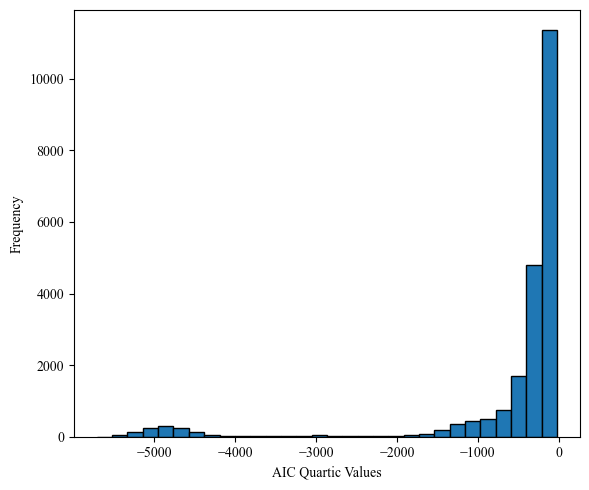

In [5]:
# Plotting the distribution of 'aic_quartic_original'
plt.figure(figsize=(6, 5))
plt.hist(df_select['AIC Quartic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Quartic Values')
plt.ylabel('Frequency')

plt.tight_layout()

plot_title = "Distribution of Original AIC Quartic Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')


In [6]:
# Remove rows where 'aic_quartic_original' is less than -600
df_select = df_select[df_select['AIC Quartic (Minimum)'] >= -450]

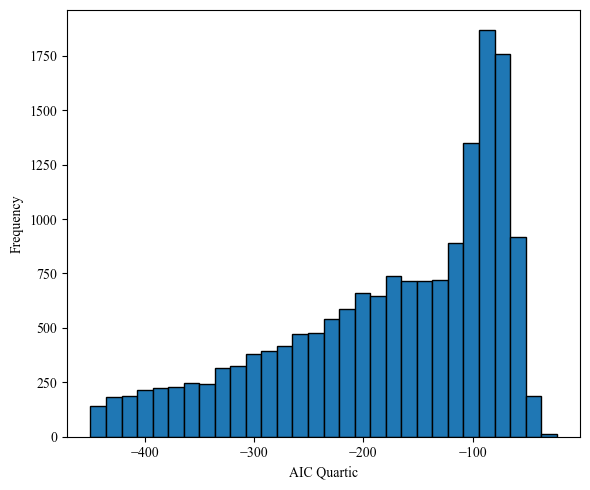

In [7]:
# Plotting the distribution of 'aic_quartic_original'
plt.figure(figsize=(6, 5))
plt.hist(df_select['AIC Quartic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Quartic')
plt.ylabel('Frequency')
plt.tight_layout()

plot_title = "Distribution of Filtered AIC Quartic.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

In [8]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = df_select.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head(10)


,capacity_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-45.206369,-105.712987,1.152472,1.373940
1,0.1,-43.944952,-129.388407,2.392821,2.819265
2,0.2,-53.686537,-141.997894,2.721618,3.095202
3,0.3,-68.295244,-153.894398,2.978353,3.299927
4,0.4,-90.916164,-169.878340,3.219585,3.446909
5,0.5,-111.298493,-181.703662,3.410826,3.607953
6,0.6,-131.373890,-197.148189,3.521756,3.661493
7,0.7,-142.611893,-208.722922,3.550023,3.675652
8,0.8,-150.510676,-215.795540,3.578845,3.692601
9,0.9,-159.623752,-229.030939,3.611720,3.686952


In [9]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = df_select.groupby(['creativity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head(11)

,creativity_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-45.206369,-105.712987,1.152472,1.373940
1,0.1,-87.031683,-159.291752,2.696776,2.970069
2,0.2,-96.176943,-169.472194,2.825502,3.094298
3,0.3,-93.011094,-166.220646,2.948401,3.192672
4,0.4,-99.433065,-174.631073,3.105471,3.363647
5,0.5,-102.959889,-177.697705,3.235177,3.454020
6,0.6,-106.909743,-184.359259,3.354736,3.580107
7,0.7,-105.626845,-182.329952,3.435586,3.666521
8,0.8,-110.906437,-190.234211,3.532892,3.721710
9,0.9,-111.835241,-191.999833,3.580391,3.771917


In [10]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test_2 = df_select.groupby(['learning_rate_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test_2.head(50)

,learning_rate_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-45.206369,-105.712987,1.152472,1.373940
1,0.1,-76.136878,-147.742803,2.848803,3.204842
2,0.2,-84.478959,-157.444480,2.970534,3.304404
3,0.3,-91.969278,-164.647158,3.062601,3.327982
4,0.4,-95.346205,-169.265156,3.128378,3.386355
5,0.5,-102.785490,-177.181186,3.264289,3.484828
6,0.6,-110.984337,-189.636678,3.318719,3.514598
7,0.7,-117.647461,-197.641745,3.399501,3.558785
8,0.8,-121.181663,-201.833539,3.372116,3.512727
9,0.9,-119.072115,-197.666406,3.397400,3.538666


In [11]:
# rows_to_duplicate = grouped_df[grouped_df['percentage_willing_to_share_info'] == 0]
rows_to_duplicate = df_select[df_select['percentage_willing_to_share_info'] == 0]

duplicated_rows = pd.concat([rows_to_duplicate] * 100, ignore_index=True)

df_extended = pd.concat([df_select, duplicated_rows], ignore_index=True)


# Data Normalization

In [12]:
df_extended['AIC Quartic (Minimum) Original'] = df_extended['AIC Quartic (Minimum)']
columns_to_scale = ['Average Satisfaction', 'mean_purchase_position','percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products', 'AIC Quartic (Sum)', 'AIC Quartic (Minimum)', 'Average Seller Rating']
scaler = MinMaxScaler()
df_extended[columns_to_scale] = scaler.fit_transform(df_extended[columns_to_scale])
data_normalized_df = df_extended

# Split learning_rate_gen_ai

In [13]:
# Determine the minimum and maximum values of the 'learning_rate_gen_ai' column
min_value = data_normalized_df['learning_rate_gen_ai'].min()
max_value = data_normalized_df['learning_rate_gen_ai'].max()

# Calculate the range for each segment (low, medium, high)
range_per_part = (max_value - min_value) / 3

# Define thresholds for low, medium, and high categories
low_threshold = min_value + range_per_part
medium_threshold = min_value + 2 * range_per_part

# Creating new columns for low, medium, and high learning rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Learning Rate Low'] = (data_normalized_df['learning_rate_gen_ai'] <= low_threshold).astype(int)
data_normalized_df['Learning Rate Medium'] = ((data_normalized_df['learning_rate_gen_ai'] > low_threshold) & (data_normalized_df['learning_rate_gen_ai'] <= medium_threshold)).astype(int)
data_normalized_df['Learning Rate High'] = (data_normalized_df['learning_rate_gen_ai'] > medium_threshold).astype(int)

# Split creativity_gen_ai

In [14]:
# Determine the minimum and maximum values of the 'creativity_gen_ai' column
min_creativity = data_normalized_df['creativity_gen_ai'].min()
max_creativity = data_normalized_df['creativity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'creativity_gen_ai'
creativity_range_per_part = (max_creativity - min_creativity) / 3

# Define thresholds for low, medium, and high categories for 'creativity_gen_ai'
low_creativity_threshold = min_creativity + creativity_range_per_part
medium_creativity_threshold = min_creativity + 2 * creativity_range_per_part

# Creating new columns for low, medium, and high creativity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Creativity Low'] = (data_normalized_df['creativity_gen_ai'] <= low_creativity_threshold).astype(int)
data_normalized_df['Creativity Medium'] = ((data_normalized_df['creativity_gen_ai'] > low_creativity_threshold) & (data_normalized_df['creativity_gen_ai'] <= medium_creativity_threshold)).astype(int)
data_normalized_df['Creativity High'] = (data_normalized_df['creativity_gen_ai'] > medium_creativity_threshold).astype(int)

# Split capacity_gen_ai

In [15]:
# Calculate minimum and maximum values of the 'capacity_gen_ai' column
min_capacity = data_normalized_df['capacity_gen_ai'].min()
max_capacity = data_normalized_df['capacity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'capacity_gen_ai'
capacity_range_per_part = (max_capacity - min_capacity) / 3

# Define thresholds for low, medium, and high categories for 'capacity_gen_ai'
low_capacity_threshold = min_capacity + capacity_range_per_part
medium_capacity_threshold = min_capacity + 2 * capacity_range_per_part

# Creating new columns for low, medium, and high capacity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Capacity Low'] = (data_normalized_df['capacity_gen_ai'] <= low_capacity_threshold).astype(int)
data_normalized_df['Capacity Medium'] = ((data_normalized_df['capacity_gen_ai'] > low_capacity_threshold) & (data_normalized_df['capacity_gen_ai'] <= medium_capacity_threshold)).astype(int)
data_normalized_df['Capacity High'] = (data_normalized_df['capacity_gen_ai'] > medium_capacity_threshold).astype(int)

In [16]:
# rename columns
data = data_normalized_df.rename(columns={
    'Average Satisfaction': 'avg_satisfaction',
    'Average Seller Rating': 'avg_rating',
    'percentage_willing_to_share_info': 'implement_gen_ai',
    'num_customers': 'n_customer',
    'num_retailers': 'n_seller',
    'num_products': 'n_product',
    'mean_purchase_position': 'mean_purchase_position',
    'AIC Quartic (Minimum)': 'aic_quartic_min',
    'AIC Quartic (Minimum) Original': 'aic_quartic_min_org',
    'AIC Quartic (Sum)': 'aic_quartic_sum'
})

data.head(10)

,total_steps,mean_purchase_position,avg_satisfaction,learning_rate_gen_ai,capacity_gen_ai,creativity_gen_ai,implement_gen_ai,n_customer,n_seller,n_product,...,aic_quartic_min_org,Learning Rate Low,Learning Rate Medium,Learning Rate High,Creativity Low,Creativity Medium,Creativity High,Capacity Low,Capacity Medium,Capacity High
0,100,0.273391,0.683956,0.4,0.1,0.1,1.0,1.0,0.25,1.0,...,-104.964350,0,1,0,1,0,0,1,0,0
1,100,0.379298,0.643006,0.7,0.1,0.1,1.0,1.0,0.25,1.0,...,-89.726940,0,0,1,1,0,0,1,0,0
2,100,0.457841,0.531505,0.3,0.1,0.1,1.0,1.0,0.25,1.0,...,-84.783006,1,0,0,1,0,0,1,0,0
3,100,0.633713,0.281548,0.2,0.1,0.1,1.0,1.0,0.25,1.0,...,-94.935035,1,0,0,1,0,0,1,0,0
4,100,0.574094,0.400510,0.8,0.1,0.1,1.0,1.0,0.25,1.0,...,-93.625515,0,0,1,1,0,0,1,0,0
5,100,0.761870,0.290495,0.5,0.1,0.1,1.0,1.0,0.25,1.0,...,-71.180316,0,1,0,1,0,0,1,0,0
6,100,0.841665,0.090828,0.1,0.1,0.1,1.0,1.0,0.25,1.0,...,-80.193263,1,0,0,1,0,0,1,0,0
7,100,0.235460,0.803303,0.4,0.1,0.1,1.0,1.0,0.25,1.0,...,-215.641736,0,1,0,1,0,0,1,0,0
8,100,0.167017,0.852354,0.5,0.1,0.1,1.0,1.0,0.25,1.0,...,-439.131572,0,1,0,1,0,0,1,0,0
9,100,0.209349,0.843526,0.1,0.1,0.1,1.0,1.0,0.25,1.0,...,-323.701126,1,0,0,1,0,0,1,0,0


In [17]:
# Create the independent variables matrix (X) and dependent variable (y)
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'n_customer', 'n_seller', 'n_product']]

X = sm.add_constant(X)
y = data['avg_satisfaction']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:       avg_satisfaction   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     3103.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:39   Log-Likelihood:                -125.59
No. Observations:               23841   AIC:                             265.2
Df Residuals:                   23834   BIC:                             321.7
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [18]:
# Selecting the independent variables/features for the model
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'mean_purchase_position','n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)

X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_min']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        aic_quartic_min   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1611.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:39   Log-Likelihood:                 4665.2
No. Observations:               23841   AIC:                            -9314.
Df Residuals:                   23833   BIC:                            -9250.
Df Model:                           7                                         
Covariance Type:            nonrobust  

In [19]:
from semopy import Model

model_desc = """
    mean_purchase_position ~ learning_rate_gen_ai + creativity_gen_ai + capacity_gen_ai
    aic_quartic_min ~ mean_purchase_position + learning_rate_gen_ai + creativity_gen_ai + capacity_gen_ai
"""

model = Model(model_desc)
result = model.fit(data)

print(model.inspect())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                     lval  op                    rval  Estimate  Std. Err  \
0  mean_purchase_position   ~    learning_rate_gen_ai -0.034675  0.005618   
1  mean_purchase_position   ~       creativity_gen_ai -0.066237  0.005625   
2  mean_purchase_position   ~         capacity_gen_ai -0.189533  0.005770   
3         aic_quartic_min   ~  mean_purchase_position  0.397574  0.005896   
4         aic_quartic_min   ~    learning_rate_gen_ai -0.107083  0.005118   
5         aic_quartic_min   ~       creativity_gen_ai -0.012982  0.005136   
6         aic_quartic_min   ~         capacity_gen_ai -0.170319  0.005371   
7  mean_purchase_position  ~~  mean_purchase_position  0.047860  0.000438   
8         aic_quartic_min  ~~         aic_quartic_min  0.

In [20]:
# Selecting the independent variables/features for the model
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai','n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)

X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['mean_purchase_position']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                              OLS Regression Results                              
Dep. Variable:     mean_purchase_position   R-squared:                       0.242
Model:                                OLS   Adj. R-squared:                  0.242
Method:                     Least Squares   F-statistic:                     1270.
Date:                    Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                            17:05:40   Log-Likelihood:                 4344.5
No. Observations:                   23841   AIC:                            -8675.
Df Residuals:                       23834   BIC:                            -8618.
Df Model:                               6                                         
Cov

In [21]:
# Create the independent variables matrix (X) and dependent variable (y)
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'n_customer', 'n_seller', 'n_product']]

X = sm.add_constant(X)
y = data['avg_rating']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     3258.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:40   Log-Likelihood:                 1366.9
No. Observations:               23841   AIC:                            -2720.
Df Residuals:                   23834   BIC:                            -2663.
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [22]:
# Selecting the independent variables/features for the model
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)
X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_min']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        aic_quartic_min   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     1034.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:40   Log-Likelihood:                 2805.7
No. Observations:               23841   AIC:                            -5597.
Df Residuals:                   23834   BIC:                            -5541.
Df Model:                           6                                         
Covariance Type:            nonrobust  

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on AIC Quartic Values

In [23]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [24]:
df_select = data[
    data['creativity_gen_ai'].isin([0.1, 0.5, 0.9]) &
    data['capacity_gen_ai'].isin([0.2, 0.6, 0.9])&
    data['learning_rate_gen_ai'].isin([0.1, 0.5, 0.9])
]

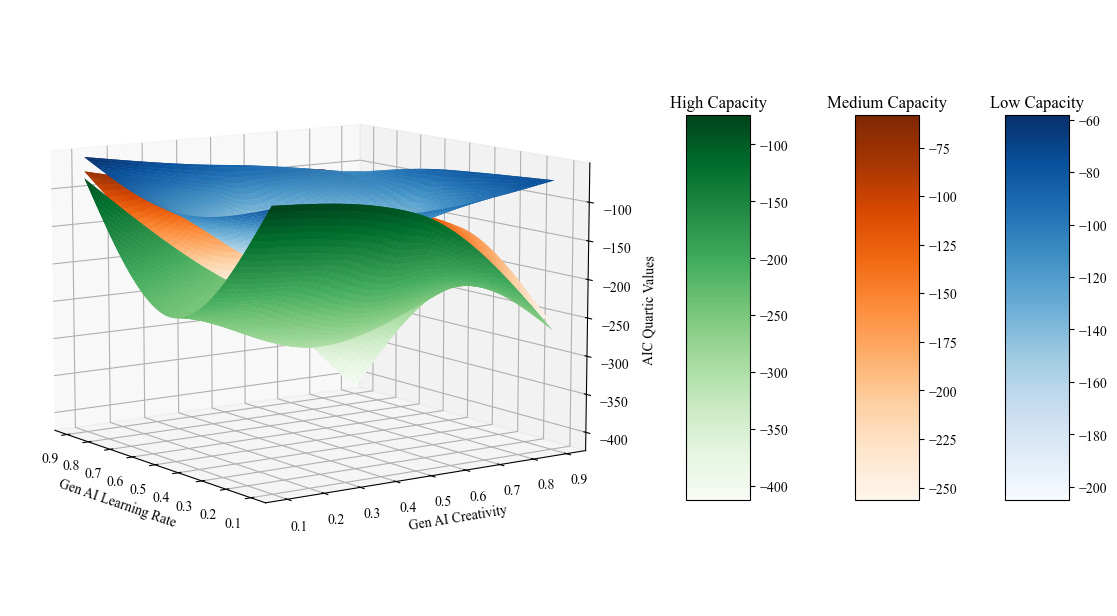

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'Times New Roman'  # Ensuring font is Times New Roman


fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['aic_quartic_min_org']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-35)


# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('AIC Quartic Values')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])
#ax.set_ylim(ax.get_ylim()[::-1])

plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on AIC Quartic Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Customer Satisfaction

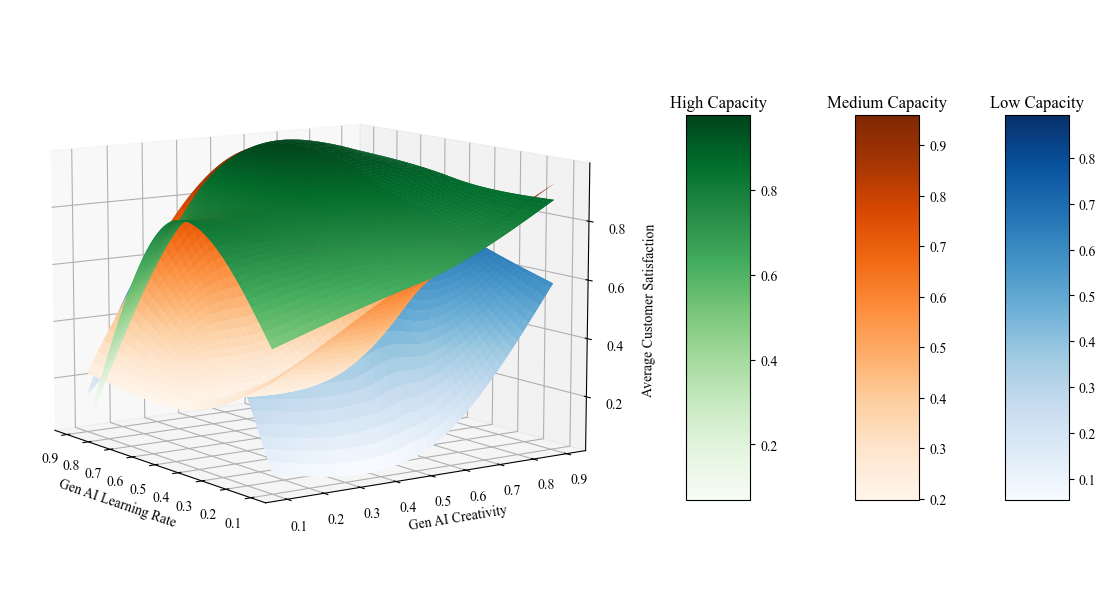

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'Times New Roman'  # Ensuring font is Times New Roman

fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['avg_satisfaction']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-35)


# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Customer Satisfaction')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])
#ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Average Buyer Satisfaction.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Seller Rating

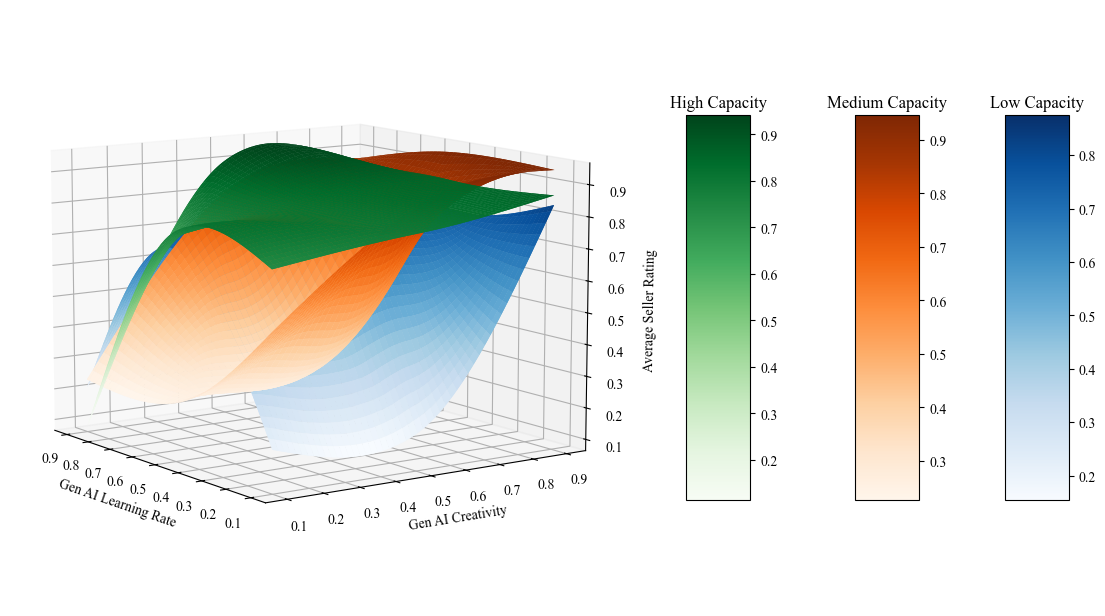

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'Times New Roman'  # Ensuring font is Times New Roman

fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['avg_rating']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-35)


# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Seller Rating')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])
#ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Average Seller Rating.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Average Purchase Position

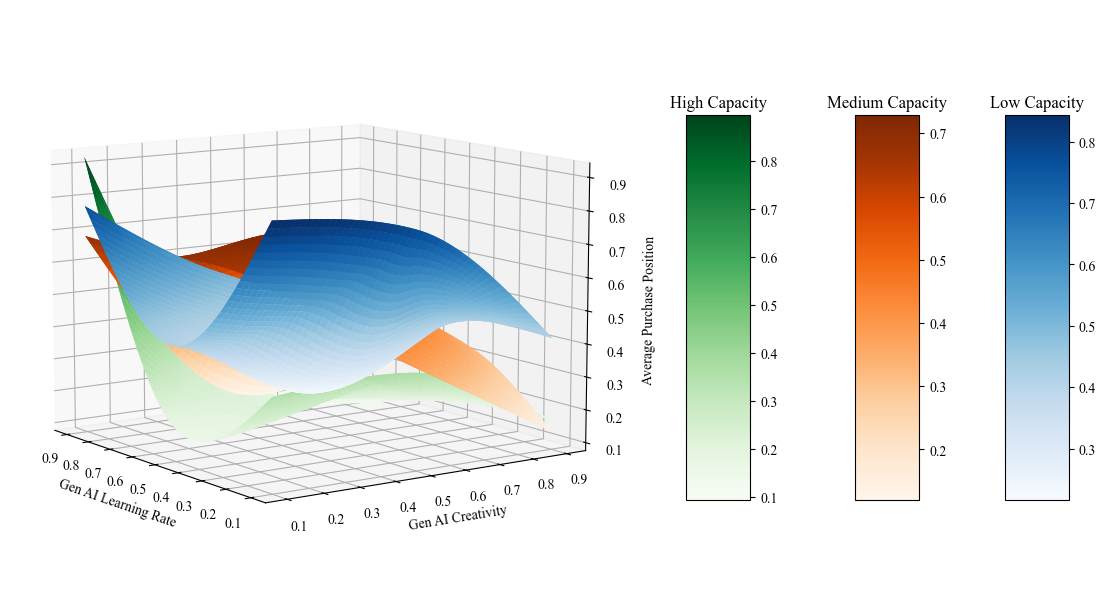

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'Times New Roman'  # Ensuring font is Times New Roman

fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['mean_purchase_position']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-35)


# Setting labels for each axis
ax.set_xlabel('Gen AI Learning Rate')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Purchase Position')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])
#ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

# Independent Effects of Learning Rate

In [29]:
print(plt.style.available)

data = data[data['capacity_gen_ai'] != 0]

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


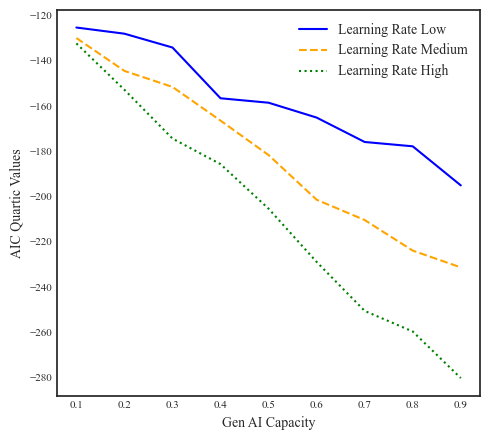

In [30]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['aic_quartic_min_org'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('AIC Quartic Values')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on AIC Quartic Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

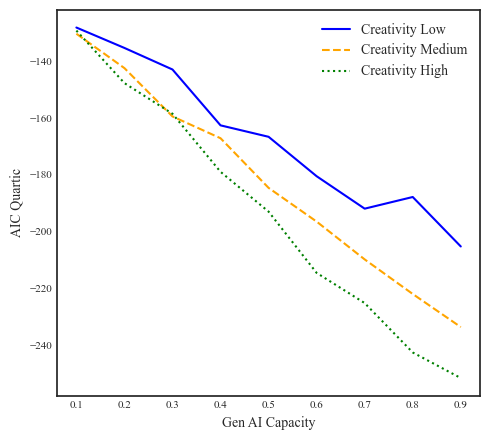

In [31]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['aic_quartic_min_org'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('AIC Quartic')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on AIC Quartic Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

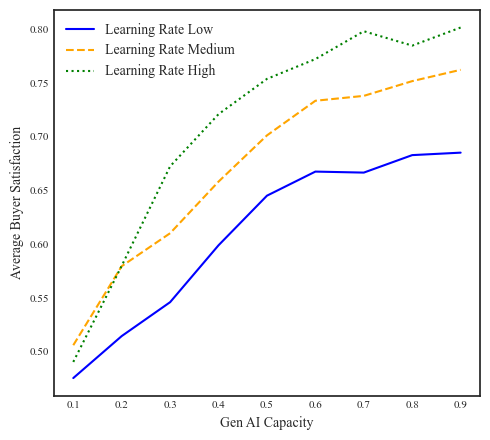

In [32]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Buyer Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Buyer Satisfaction.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

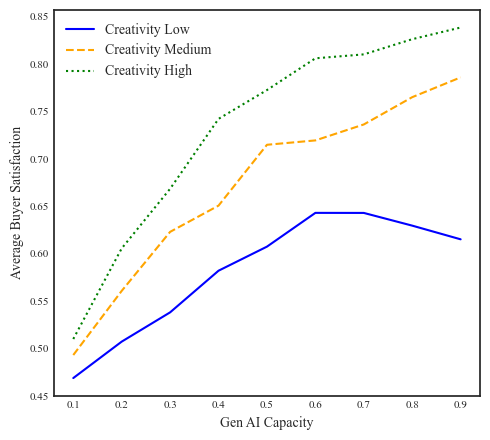

In [33]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Buyer Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Buyer Satisfaction.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

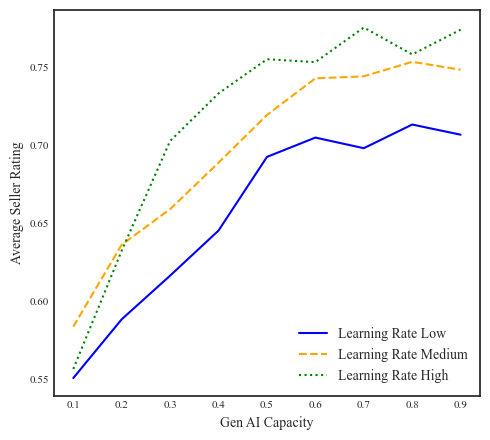

In [34]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_rating'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Seller Rating')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Seller Rating.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

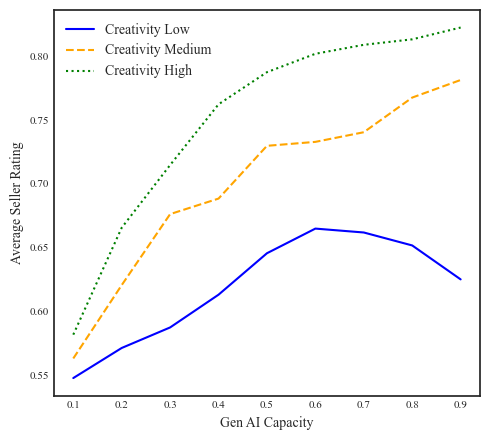

In [35]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_rating'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Seller Rating')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Seller Rating.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

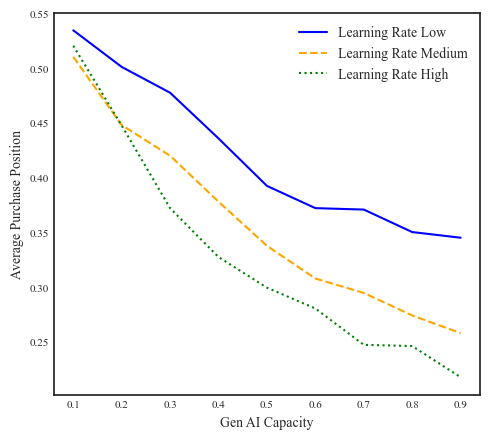

In [36]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['mean_purchase_position'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Purchase Position')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

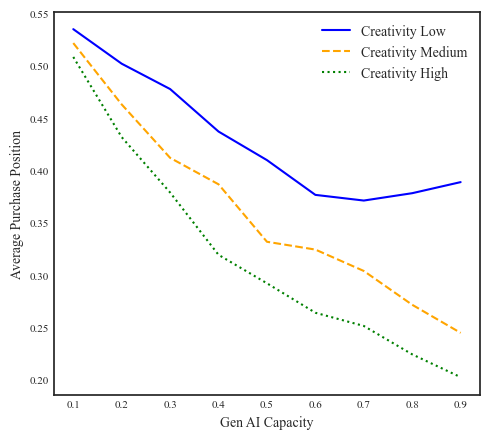

In [37]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10  # Main text size
mpl.rcParams['axes.labelsize'] = 10  # x and y labels size
mpl.rcParams['legend.fontsize'] = 10  # Legend size
mpl.rcParams['xtick.labelsize'] = 8  # x tick label size
mpl.rcParams['ytick.labelsize'] = 8  # y tick label size

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['mean_purchase_position'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Purchase Position')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

# AIC Value Comparison

In [48]:
plot_dir = "/Users/jiahuili/PycharmProjects/GenAI_Customer/plots/"


filename_33 = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulation_single_ca0.3_lr0.3.csv"
df_33 = pd.read_csv(filename_33)


filename_00 = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulation_single_ca0_lr0.csv"
df_00 = pd.read_csv(filename_00)

filename_39 = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulation_single_ca0.3_lr0.9.csv"
df_39 = pd.read_csv(filename_39)

filename_93 = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulation_single_ca0.9_lr0.3.csv"
df_93 = pd.read_csv(filename_93)

filename_99 = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulation_single_0.9_0.9.csv"
df_99 = pd.read_csv(filename_99)

df_99 = df_99[df_99['AIC Quartic (Sum)'] >= -450]

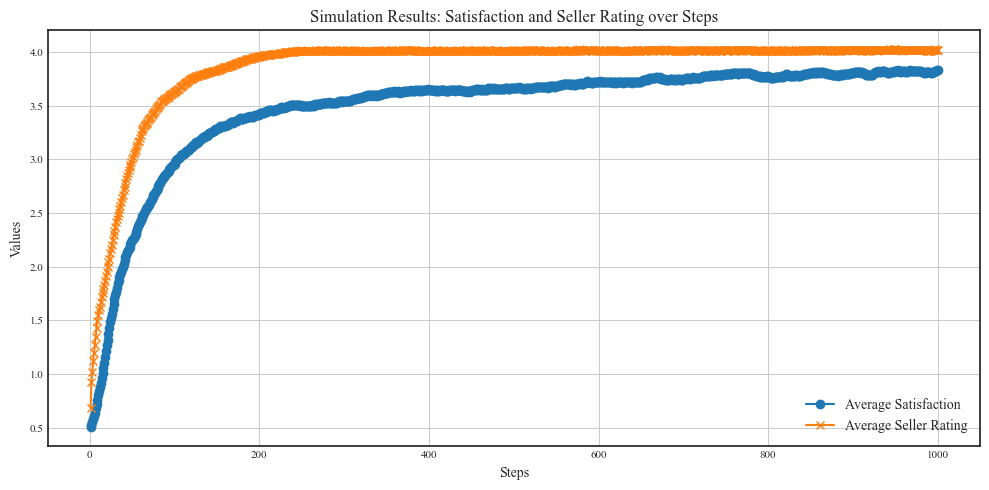

In [49]:
plt.figure(figsize=(10, 5))

plt.plot(df["steps"], df["Average Satisfaction"], label="Average Satisfaction", marker='o')
plt.plot(df["steps"], df["Average Seller Rating"], label="Average Seller Rating", marker='x')

plt.xlabel("Steps")
plt.ylabel("Values")
plt.title("Simulation Results: Satisfaction and Seller Rating over Steps")
plt.legend()

plt.grid(True)
plt.tight_layout()

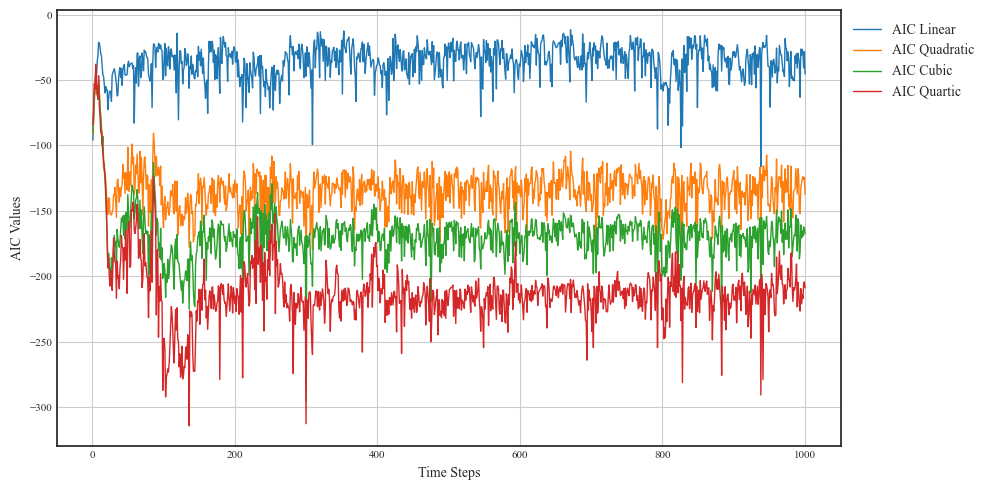

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(df_93["steps"], df_93["AIC Linear (Sum)"], label="AIC Linear", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quadratic (Sum)"], label="AIC Quadratic", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Cubic (Sum)"], label="AIC Cubic", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quartic (Sum)"], label="AIC Quartic", linewidth=1)

plt.xlabel("Time Steps")
plt.ylabel("AIC Values")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

plot_title = "AIC Values Comparison.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

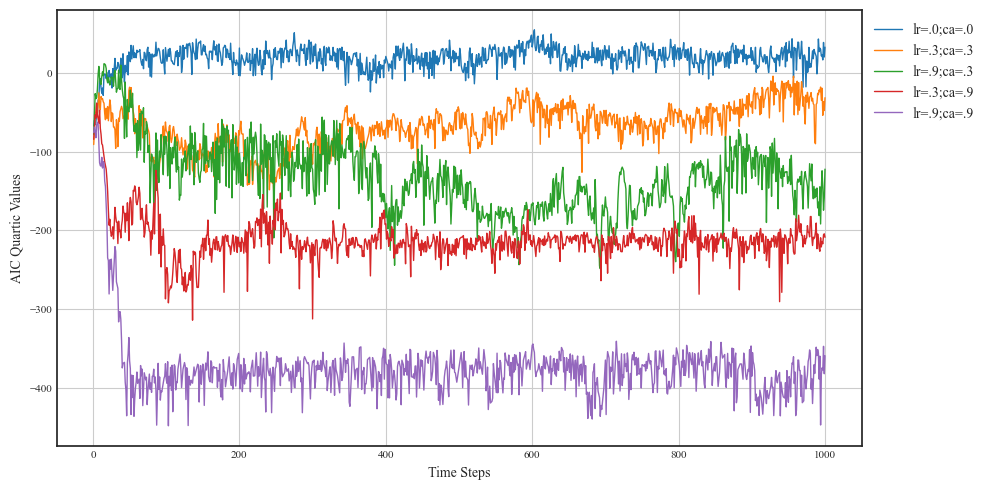

In [54]:
plt.figure(figsize=(10, 5))

plt.plot(df_00["steps"], df_00["AIC Quartic (Sum)"], label="lr=.0;ca=.0", linewidth=1)
plt.plot(df_33["steps"], df_33["AIC Quartic (Sum)"], label="lr=.3;ca=.3", linewidth=1)
plt.plot(df_39["steps"], df_39["AIC Quartic (Sum)"], label="lr=.9;ca=.3", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quartic (Sum)"], label="lr=.3;ca=.9", linewidth=1)
plt.plot(df_99["steps"], df_99["AIC Quartic (Sum)"], label="lr=.9;ca=.9", linewidth=1)


plt.xlabel("Time Steps")
plt.ylabel("AIC Quartic Values")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

plot_title = "Effect of Learning Rate and Capacity of Generative AI on the AIC Quartic Values of E-Commerce Platform"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight')

In [52]:
mpl.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})


# Implementation of Gen AI